Clustering on iris data set.

There are multiple clustering algorithms out there and I chosen 3 to reflect hard and soft clustering

In [1]:
#Load data
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

data = load_iris()
x = data.data
y = data.target

In [2]:
#How does the dataset looks like?
x.shape

(150, 4)

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
import pandas as pd

x_df = pd.DataFrame({'sepalLength': x[:,0]
                   ,'sepalWidth':x[:,1]
                    ,'petalLength':x[:,2]
                    ,'petalWidth':x[:,3]})

In [5]:
y_df = pd.DataFrame(y, columns = ['Label'])

In [6]:
df = pd.merge(x_df, y_df, left_index=True, right_index=True)

In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#Rename labels, 0 = setosa, 1 = versicolor, 2 = virginica
dict = {0:"setosa", 1:"versicolor", 2:"virginica"}
df = df.replace({"Label":dict})
df

,sepalLength,sepalWidth,petalLength,petalWidth,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Check for missing values
df.isnull().values.any()


False

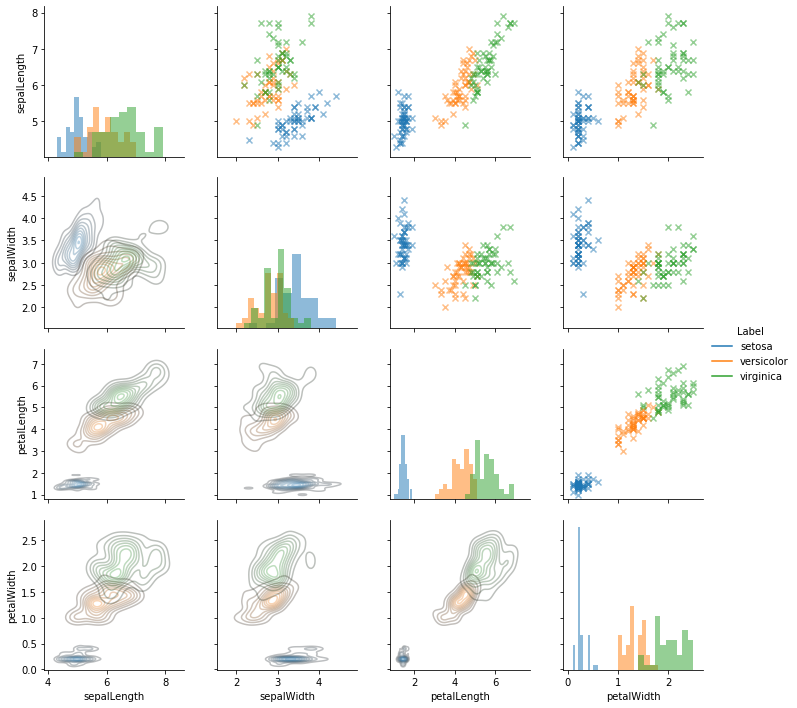

In [104]:
#Some visualization to aid data exploration
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.PairGrid(df, hue= "Label")
g.map_diag(plt.hist, alpha = 0.5)
g.map_upper(plt.scatter, alpha = 0.5, marker = 'x')
g.map_lower(sns.kdeplot, shade_lowest = False ,alpha = 0.3)
g.add_legend()

Iris is linearly separable but versicolor and virginica are not

What about the correlation between features?

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1,-0.12,0.87,0.82
sepalWidth,-0.12,1,-0.43,-0.37
petalLength,0.87,-0.43,1,0.96
petalWidth,0.82,-0.37,0.96,1


Data is highly correlated. Example is sepalLength with petalLength and petalWidth

Do we need to rescale? 
Do we need to normalize? 
Do we need to remove linear dependence?

Clustering basically work on distance. The larger feature will dominate others in clustering.
petalWidth is significantly smaller. We need to rescale.

Since some features are highly correlated, we need to remove linear dependence too. Perform PCA.

In [13]:
#Rescale data
from sklearn import preprocessing

#Scaling vs Normalization? 
#When is the best condition for scaling vs normalization
#Scaling is about changing the range, mean and standard deviation remains the same
#Normalization involves changing the data to a unit norm, ensure the data is normally distributed
#
scaler = preprocessing.StandardScaler()

scaler.fit(x_df)
x_scaled = scaler.transform(x_df)
x_scaled = pd.DataFrame(x_scaled, columns= x_df.columns)
x_scaled.sample(10)

,sepalLength,sepalWidth,petalLength,petalWidth
92,-0.052506,-1.052767,0.137547,0.000878
108,1.038005,-1.282963,1.160620,0.790671
5,-0.537178,1.939791,-1.169714,-1.052180
145,1.038005,-0.131979,0.819596,1.448832
40,-1.021849,1.019004,-1.397064,-1.183812
55,-0.173674,-0.592373,0.421734,0.132510
21,-0.900681,1.479398,-1.283389,-1.052180
54,0.795669,-0.592373,0.478571,0.395774
53,-0.416010,-1.743357,0.137547,0.132510
130,1.886180,-0.592373,1.331133,0.922303


In [40]:
#Clustering on 4D data

from sklearn.cluster import KMeans

km = KMeans(n_clusters= 3, random_state= 42)
km.fit(x_scaled)
y_kmeans = km.predict(x_scaled)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Spliting training and testing data

In [61]:
#Use silhouette analysis or cross tabulation
ct = pd.crosstab(y_kmeans, df['Label'])
print(ct)

Label  setosa  versicolor  virginica
row_0                               
0           0          11         36
1          50           0          0
2           0          39         14


From the cross tabulation table, Kmeans (k=3) can split setosa nicely
However, it is hard to separate versicolor and virginica

In [16]:
from sklearn import metrics

score = metrics.silhouette_score(x_scaled, y_kmeans)
score

0.45994823920518646

For silhouette score, value near +1 indicates sample is far away from neighbouring clusters. Value of 0 indicates that the sample is close to the decision boundary between two neighbouring clusters. Negative value means samples might have been assigned to the wrong cluster

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C61C63588>,
      dtype=object)

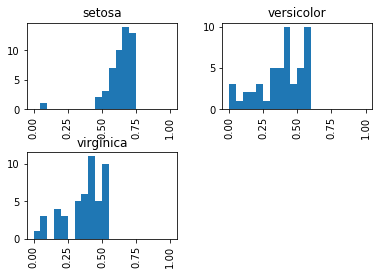

In [17]:
#Let's see silhouette score for each species
score = metrics.silhouette_samples(x_scaled, y_kmeans)
df_scores = pd.DataFrame()
df_scores['Score'] = score
df_scores['Label' ] = df['Label']
df_scores.hist(by='Label', column = 'Score', range = (0,1.0), bins = 20)

As supplemented by cross tabulation, versicolor and virginica have lower scores

In [18]:
#Bad results, before that how do we determine K?
#Fitting multiple k values
import numpy as np

error = []

#Silhouette cannot be computed when there is only 1 cluster, start with min 2
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=42)
    y_kmeans= km.fit_predict(x_scaled)
    y_kmeans = km.predict(x_scaled)
    score = metrics.silhouette_score(x_scaled, y_kmeans)
#     print(score)
    print("n_clusters in = {}, silhouette score is {}".format(i, score))
    error.append(score)


n_clusters in = 2, silhouette score is 0.5817500491982808
n_clusters in = 3, silhouette score is 0.45994823920518646
n_clusters in = 4, silhouette score is 0.3869410415442781
n_clusters in = 5, silhouette score is 0.34194697093163473
n_clusters in = 6, silhouette score is 0.32674451109112396
n_clusters in = 7, silhouette score is 0.3241360111543788
n_clusters in = 8, silhouette score is 0.3328739067356281
n_clusters in = 9, silhouette score is 0.3561629819248505
n_clusters in = 10, silhouette score is 0.3599558463589516
n_clusters in = 11, silhouette score is 0.36013452700873977
n_clusters in = 12, silhouette score is 0.35672144342546275
n_clusters in = 13, silhouette score is 0.3299247280011796
n_clusters in = 14, silhouette score is 0.35956127523255416
n_clusters in = 15, silhouette score is 0.33408084943249367
n_clusters in = 16, silhouette score is 0.3392916527676213
n_clusters in = 17, silhouette score is 0.3214139115421244
n_clusters in = 18, silhouette score is 0.307566652782774

Text(0, 0.5, 'silhouette score')

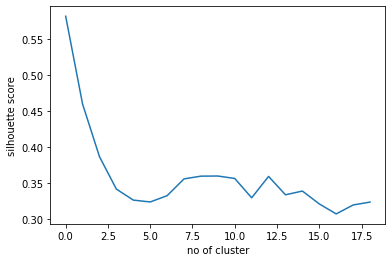

In [37]:
plt.plot(error)
plt.xlabel('no of cluster')
plt.ylabel('silhouette score')

So K = 3 or 3 clusters are optimal is optimal

In [92]:
#Time to try PCA
#Determine the optimal number of PC

for i in range(1,len(x_scaled.columns)+1):
    pca = PCA(n_components=i, random_state=42).fit(x_scaled)
    print(pca.explained_variance_ratio_.cumsum())
    
# pca = PCA(n_components=3, random_state=42)
# pca.fit(x_scaled)
# x_pca = pca.transform(x_scaled)
# x_pca = pd.DataFrame(x_pca, columns=['PC1','PC2'])

# print(pca.explained_variance_ratio_.cumsum())

[0.72962445]
[0.72962445 0.95813207]
[0.72962445 0.95813207 0.99482129]
[0.72962445 0.95813207 0.99482129 1.        ]


Anything more than 2 PC is sub-optimal

In [93]:
pca = PCA(n_components=2, random_state=42).fit_transform(x_scaled)
pca_df = pd.DataFrame(pca, columns=['PC1','PC2'])
pca_df.sample(5)

,PC1,PC2
43,-1.964448,0.472327
1,-2.080961,-0.674134
22,-2.774345,0.458344
18,-1.898572,1.405019
25,-1.951846,-0.625619


<Figure size 432x288 with 0 Axes>

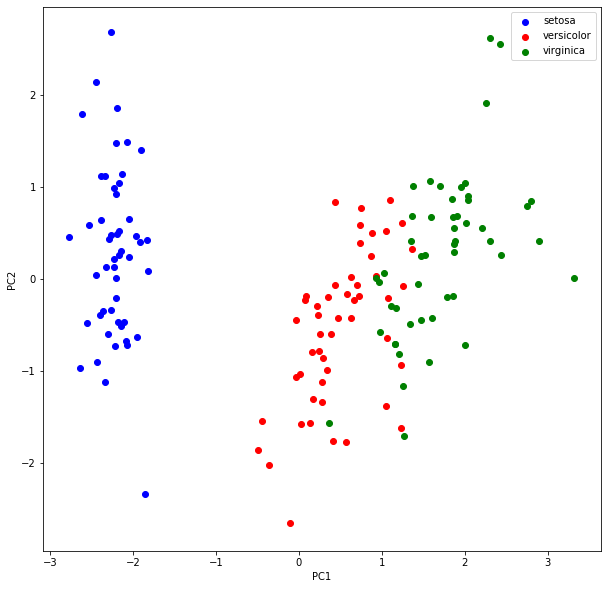

In [106]:
plt.figure()
plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = ['setosa','versicolor', 'virginica']
colors = ['b', 'r', 'g']
for target, color in zip(targets, colors):
    keep = df["Label"] == target
    plt.scatter(pca_df.loc[keep, 'PC1'],
               pca_df.loc[keep, 'PC2'],
               c = color)
plt.legend(targets)

array(['setosa', 'versicolor', 'virginica'], dtype=object)